In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n = 50

# registration numbers and names for students.
reg_nums = [f"REG{str(i).zfill(3)}" for i in range(1, n+1)]
names = [f"Student {i}" for i in range(1, n+1)]

# random marks between 0 and 20 (full marks = 20)
tt1_marks = np.random.randint(0, 21, size=n)
df_tt1 = pd.DataFrame({
    'Registration Number': reg_nums,
    'Name': names,
    'TT-1 Marks': tt1_marks
})
df_tt1.to_csv('term-test-1-result.csv', index=False)
print("Created 'term-test-1-result.csv'")



# different random marks for term test 2.
tt2_marks = np.random.randint(0, 21, size=n)
df_tt2 = pd.DataFrame({
    'Registration Number': reg_nums,
    'Name': names,
    'TT-2 Marks': tt2_marks
})
df_tt2.to_csv('term-test-2-result.csv', index=False)
print("Created 'term-test-2-result.csv'")





# merge Registration Number

df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')
# Merge on Registration Number; both files share the same Name.
df_merge = pd.merge(df1, df2, on='Registration Number', suffixes=('_tt1', '_tt2'))
# Since the Name columns are the same, keep one and drop the duplicate.
df_merge.drop('Name_tt2', axis=1, inplace=True)
df_merge.rename(columns={'Name_tt1': 'Name'}, inplace=True)




df_merge['Best Term Test Marks'] = df_merge[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df_merge['Average Term Test Marks'] = df_merge[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

df_merge.drop(['TT-1 Marks', 'TT-2 Marks'], axis=1, inplace=True)




# Generate random attendance marks (0 to 10) and term final marks (0 to 100)
attendance_marks = np.random.randint(0, 11, size=n)
term_final_marks = np.random.randint(0, 101, size=n)
df_att = pd.DataFrame({
    'Registration Number': reg_nums,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})
df_att.to_csv('attendance_term_final.csv', index=False)
print("Created 'attendance_term_final.csv'")




df_att_loaded = pd.read_csv('attendance_term_final.csv')
df_all = pd.merge(df_merge, df_att_loaded, on='Registration Number')

# Final Marks = (Term Final Marks * 0.7) + Average Term Test Marks + Attendance Marks
df_all['Final Marks'] = (df_all['Term Final Marks'] * 0.7) + df_all['Average Term Test Marks'] + df_all['Attendance Marks']


df_all.to_csv('final result.csv', index=False)
print("Created 'final result.csv'")

Matplotlib is building the font cache; this may take a moment.


Created 'term-test-1-result.csv'
Created 'term-test-2-result.csv'
Created 'attendance_term_final.csv'
Created 'final result.csv'


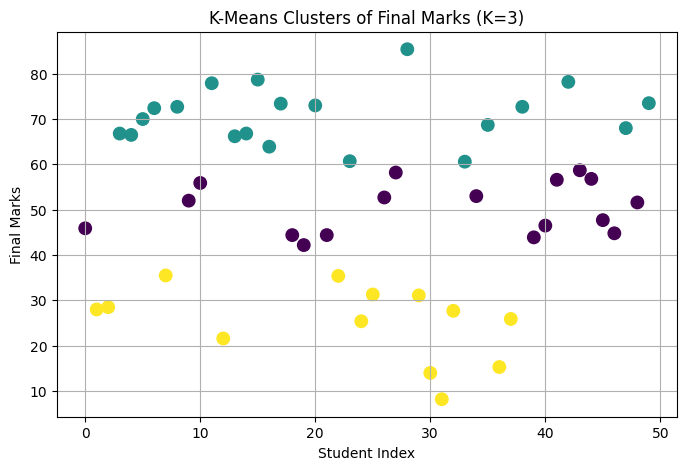

In [2]:
X = df_all[['Final Marks']].values



k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_all['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8, 5))
plt.scatter(range(n), df_all['Final Marks'], c=df_all['Cluster'], cmap='viridis', s=80)
plt.xlabel('Student Index')
plt.ylabel('Final Marks')
plt.title('K-Means Clusters of Final Marks (K=3)')
plt.grid(True)
plt.show()